In [2]:
!pip install yfinance lxml

   ---------------------------------------- 0.0/3.8 MB ? eta -:--:--
   -------- ------------------------------- 0.8/3.8 MB 5.6 MB/s eta 0:00:01
   ---------- ----------------------------- 1.0/3.8 MB 3.6 MB/s eta 0:00:01
   ------------- -------------------------- 1.3/3.8 MB 2.3 MB/s eta 0:00:02
   ------------------------ --------------- 2.4/3.8 MB 2.7 MB/s eta 0:00:01
   -------------------------------------- - 3.7/3.8 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 3.8/3.8 MB 3.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import requests
from io import StringIO

In [ ]:
ticker = yf.Ticker('005930.KS')
quotes = ticker.history(period='max', interval='1d')

In [12]:
print(quotes.shape)
quotes.head()

(6330, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-04 00:00:00+09:00,4296.628382,4375.399902,4053.152774,4375.399902,74195000,0.0,0.0
2000-01-05 00:00:00+09:00,4153.407293,4339.594517,3952.897975,3995.864258,74680000,0.0,0.0
2000-01-06 00:00:00+09:00,4117.602409,4139.085552,3995.864598,4024.508789,54390000,0.0,0.0
2000-01-07 00:00:00+09:00,3981.541574,4060.313080,3838.320654,3967.219482,40305000,0.0,0.0
2000-01-10 00:00:00+09:00,4010.186038,4131.923828,3995.863945,4131.923828,46880000,0.0,0.0


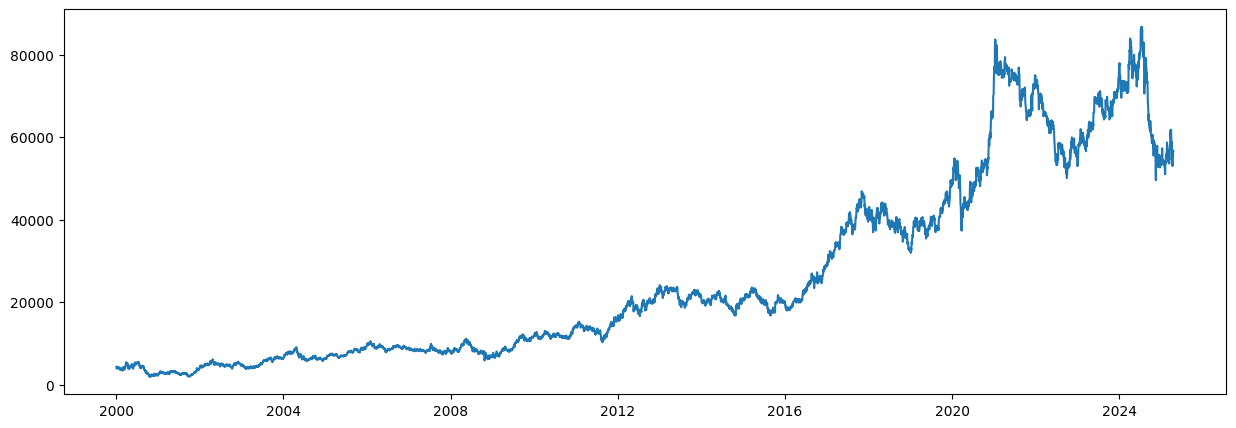

In [17]:
plt.figure(figsize=(15, 5))
plt.plot(quotes.index, quotes['Close'])
plt.show()

In [18]:
api_url = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
params = {
    "method": "download",
    "marketType": "stockMkt"
}

resp = requests.get(api_url, params)


In [20]:
print(resp.text)







<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />
<title>상장법인목록(EXCEL)</title>
</head>
<body>
	<table cellpadding="0" cellspacing="1" class="bbs_tb" border="1">
	
	<col width="20%" />
	<col width="10%" />
	<col width="15%" />
	<col width="20%" />
	<col width="10%" />
	<col width="5%" />
	<col width="8%" />
	<col width="7%" />
	<col width="5%" />
	<tr>
		<th bgcolor="#66FF99" >회사명</th>
		<th bgcolor="#66FF99" >종목코드</th>
		<th bgcolor="#66FF99" >업종</th>
		<th bgcolor="#66FF99" >주요제품</th>
		<th bgcolor="#66FF99" >상장일</th>
		<th bgcolor="#66FF99" >결산월</th>
		<th bgcolor="#66FF99" >대표자명</th>
		<th bgcolor="#66FF99" >홈페이지</th>
		<th bgcolor="#66FF99" >지역</th>
	</tr>
	
		
			
	<tr>
		<td>DSR제강</td>
		<td style="mso-number-format:'@';text-align:center;">069730</td>
		<td>1차 철강 제조업</td>
		<td>와이어로프,각종 경강선,철선제품,PC강선,아연도 강연선 제조</td>
		<td style="text-align:center;">2003-01-28</td>
		<td style="text-align:center;">12월</t

In [27]:
pd.read_html(StringIO(resp.text))[0].head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DSR제강,69730,1차 철강 제조업,"와이어로프,각종 경강선,철선제품,PC강선,아연도 강연선 제조",2003-01-28,12월,"홍하종, 홍석빈 (각자 대표이사)",http://www.dsrcorp.com,전라남도
1,GS글로벌,1250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,이영환,http://www.gsgcorp.com,서울특별시
2,HDC랩스,39570,전기 및 통신 공사업,"기계설비공사, 스마트홈, 지능형 빌딩, SOC, 인테리어, 조경, 시설관리",2015-09-24,12월,김성은,http://www.hdc-labs.com/,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"정경구, 조태제(각자 대표이사)",http://www.hdc-dvp.com,서울특별시
4,HD현대,267250,기타 금융업,지주회사,2017-05-10,12월,"권오갑, 정기선",http://www.hd.com,경기도


In [38]:
api_url = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
params = {
    "method": "download",
    "marketType": "stockMkt"    # kosdaqMkt
}

resp = requests.get(api_url, params)
df_kospi = pd.read_html(StringIO(resp.text))[0]
df_kospi['종목코드'] = df_kospi['종목코드'].map(lambda v: f'{v}.KS')


params["marketType"] = "kosdaqMkt"
resp = requests.get(api_url, params)
df_kosdaq = pd.read_html(StringIO(resp.text))[0]
df_kosdaq['종목코드'] = df_kosdaq['종목코드'].map(lambda v: f'{v}.KQ')

df_stocks = pd.concat([df_kospi, df_kosdaq])

In [39]:
df_stocks.shape
df_stocks[['회사명', '종목코드']].head()

,회사명,종목코드
0,DSR제강,69730.KS
1,GS글로벌,1250.KS
2,HDC랩스,39570.KS
3,HDC현대산업개발,294870.KS
4,HD현대,267250.KS


In [52]:

df_stocks[['회사명', '종목코드']].to_csv('stock-code.csv', encoding='utf-8', index=False)

In [ ]:
# map 함수 사용, 람다 사용
import random

s = pd.Series([1, 2, 3, 4, 5, 6, 7])
ns = []

for v in s:
    ns.append(v * random.randint(100,1000))
ns = pd.Series(ns)
print(ns)

ns2 = s.map(lambda v: v * random.randint(100,1000)) # 반복문을 통해 각 값에 대해 전달인자에 지정된 함수 실행
print(ns2)

0     782
1     272
2    1290
3    1200
4    2945
5    2838
6    4669
dtype: int64
0     189
1     754
2     975
3     616
4    4165
5    2280
6    2800
dtype: int64


In [51]:
import random

df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6, 7], 'b': [10, 20, 30, 40, 50, 60, 70]})

#df.map(lambda row: print(row)) # axis 사용하려면 apply
#df.apply(lambda row: print(row, type(row)),axis=1)
df.apply(lambda row: row['a'] + row['b'] , axis=1)  # def(row): row['a'] + row['b']



0    11
1    22
2    33
3    44
4    55
5    66
6    77
dtype: int64